# UBER RIDES DATA BUSSINESS UNDERSTATING

> Uber is a ride-hailing company that operates in over 900 cities worldwide.The company provides a platform for riders to connect with drivers through websites or mobile apps. Uber collects and analyzes data from various sources to improve its services and provide a better user experience

> Understanding the business model of Uber can help identify challenges that can be solved using analytics and scientific data.
Through a machine learning algorithm, the models become more accurate in their predictive power with each ride filed. This matching algorithm allows Uber to minimize the number of variables a customer has to enter. In addition to that, they offer lower wait times and a more reliable experience for riders. Drivers, in turn, get more time to earn. Surge pricing allows Uber to effectively operate a dynamic pricing model. Using geo-location coordinates from drivers, street traffic, and ride demand data, the so-called Geosurge-algorithm compares theoretical ideals with what is actually implemented in the real world to make alterations based on the time of the journey. Using this process, fares are updated in real-time based on demand.

In [1]:
# importing packages
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder , OrdinalEncoder , PowerTransformer , RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score


In [2]:
# load dataset
df = pd.read_csv(r"C:\Users\kalag\Downloads\uber_rides_data.xlsx - sample_train.csv")

In [3]:
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# DATA UNDERSTANDING
>`ride_id`: This appears to be a unique identifier or ID for each ride. It is likely used to uniquely identify individual rides in the dataset.

>`fare_amount`: This feature represents the fare amount for each ride. It is the continuous numerical value that you want to predict or analyze in your machine learning tasks. The fare amount is typically the cost of the ride.

>`pickup_datetime`:This feature contains the date and time when the ride was picked up. While it is stored as an object data type, it should ideally be converted to a datetime data type for time-series analysis and feature engineering.

>`pickup_longitude`:This feature represents the longitude coordinate of the pickup location. It specifies the geographic location of where the passenger was picked up.

>`pickup_latitude`: This feature represents the latitude coordinate of the pickup location. Similar to 'pickup_longitude,' it specifies the geographic location of where the passenger was picked up.

>`dropoff_longitude`:This feature represents the longitude coordinate of the drop-off location. It specifies the geographic location of where the passenger was dropped off. Note that there is one missing value in this column.

>`dropoff_latitude`:This feature represents the latitude coordinate of the drop-off location. Similar to 'dropoff_longitude,' it specifies the geographic location of where the passenger was dropped off. Note that there is one missing value in this column.

>`passenger_count`:This feature represents the number of passengers in the ride. It's a discrete numerical value indicating how many passengers were in the vehicle during the ride.

# DATA PREPRARATION AND SOLVING QUESTIONS

## What is the shape of given dataset?

In [4]:
df.shape

(200000, 8)

## How many integer columns(by default) are given in the dataset?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ride_id            200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ MB


In [6]:
len(df.select_dtypes(include=['int']).columns)

2

## How many missing values exists in 'dropoff_longitude' column?


In [7]:
df['dropoff_longitude'].isna().sum()

1

## What is the data type of ' pickup_datetime' feature in your data?


In [8]:
df['pickup_datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 200000 entries, 0 to 199999
Series name: pickup_datetime
Non-Null Count   Dtype 
--------------   ----- 
200000 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


## Which of the following is the correct syntax to convert 'pickup_datetime' to datetime datatype?

In [9]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [10]:
df['pickup_datetime']

0        2015-05-07 19:52:06+00:00
1        2009-07-17 20:04:56+00:00
2        2009-08-24 21:45:00+00:00
3        2009-06-26 08:22:21+00:00
4        2014-08-28 17:47:00+00:00
                    ...           
199995   2012-10-28 10:49:00+00:00
199996   2014-03-14 01:09:00+00:00
199997   2009-06-29 00:42:00+00:00
199998   2015-05-20 14:56:25+00:00
199999   2010-05-15 04:08:00+00:00
Name: pickup_datetime, Length: 200000, dtype: datetime64[ns, UTC]

In [11]:
# df['pickup_datetime'].astype('datetime64[ns]')

## Which function can be used to remove null values from the dataframe?


In [12]:
df = df.dropna()

## What is the average fare amount?
Remove the null values from the dataframe to answer the following question.

In [13]:
df.isna().sum()

ride_id              0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ride_id,199999.0,2.771248e+07,1.601386e+07,1.000000,1.382534e+07,2.774524e+07,4.155535e+07,5.542357e+07
fare_amount,199999.0,1.135989e+01,9.901760e+00,-52.000000,6.000000e+00,8.500000e+00,1.250000e+01,4.990000e+02
pickup_longitude,199999.0,-7.252763e+01,1.143782e+01,-1340.648410,-7.399206e+01,-7.398182e+01,-7.396715e+01,5.741846e+01
pickup_latitude,199999.0,3.993588e+01,7.720558e+00,-74.015515,4.073480e+01,4.075259e+01,4.076716e+01,1.644421e+03
dropoff_longitude,199999.0,-7.252529e+01,1.311741e+01,-3356.666300,-7.399141e+01,-7.398009e+01,-7.396366e+01,1.153573e+03
dropoff_latitude,199999.0,3.992389e+01,6.794829e+00,-881.985513,4.073382e+01,4.075304e+01,4.076800e+01,8.726976e+02
passenger_count,199999.0,1.684543e+00,1.385995e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,2.080000e+02


In [15]:
df['fare_amount'].mean()

11.359891549457748

# Calculate distance between each pickup and dropoff points using Haversine formula. What is the median haversine distance between pickup and dropoff location according to the given dataset?

In [16]:
def haversine(lat1, lon1, lat2, lon2):

    R = 6371.0
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

df['haversine_distance'] = df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'],
                                                          row['dropoff_latitude'], row['dropoff_longitude']), axis=1)


In [17]:
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


In [18]:
df['haversine_distance'].median()

2.1209923961833708

## What is the maximum haversine distance between pickup and dropoff location according to the given dataset?

In [19]:
df['haversine_distance'].describe()

count    199999.000000
mean         20.855350
std         382.964642
min           0.000000
25%           1.215222
50%           2.120992
75%           3.875169
max       16409.239135
Name: haversine_distance, dtype: float64

In [20]:
df['haversine_distance'].max()

16409.239135313168

## How many rides have 0.0 haversine distance between pickup and dropoff location according to the given dataset?

In [21]:
dfh_0 = df[df['haversine_distance'] == 0]

In [22]:
len(dfh_0)

5632

## What is the mean 'fare_amount' for rides with 0 haversine distance?


In [23]:
dfh_0['fare_amount'].describe()

count    5632.000000
mean       11.585318
std        14.096550
min         0.000000
25%         5.300000
50%         7.700000
75%        12.000000
max       350.000000
Name: fare_amount, dtype: float64

In [24]:
dfh_0['fare_amount'].mean()

11.585317826704546

## What is the maximum 'fare_amount' for a ride

In [25]:
df['fare_amount'].describe()

count    199999.000000
mean         11.359892
std           9.901760
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

In [26]:
df['fare_amount'].max()

499.0

## What is the haversine distance between pickup & dropoff location for the costliest ride?

In [27]:
costliest_ride = df[df['fare_amount'] == df['fare_amount'].max()]

In [28]:
costliest_ride

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance
170081,51151143,499.0,2011-04-10 04:10:00+00:00,-73.968377,40.764602,-73.968368,40.7646,1,0.00079


In [29]:
costliest_ride['haversine_distance']

170081    0.00079
Name: haversine_distance, dtype: float64

## How many rides were recorded in the year 2014?

In [30]:
ride_2014 = df[(df['pickup_datetime'].dt.year == 2014)]
len(ride_2014)

29968

## How many rides were recorded in the first quarter of 2014?


In [31]:
ride_2014_1Q = df[(df['pickup_datetime'].dt.year == 2014)& (df['pickup_datetime'].dt.quarter == 1)]
len(ride_2014_1Q)

7687

## On which day of the week in September 2010, maximum rides were recorded ?

In [32]:
ride_2010_9 = df[(df['pickup_datetime'].dt.year == 2010) & (df['pickup_datetime'].dt.month == 9)]
ride_2010_9['dat_of_week'] = ride_2010_9['pickup_datetime'].dt.dayofweek
x = ride_2010_9['dat_of_week'].value_counts()
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
max_ride = day_names[x.idxmax()]
max_ride

C:\Users\kalag\AppData\Local\Temp\ipykernel_5496\2628072214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ride_2010_9['dat_of_week'] = ride_2010_9['pickup_datetime'].dt.dayofweek


'Thursday'

## Apply a Machine Learning Algorithm to predict the fare amount given following input features:
passenger_count, distance and ride_week_day.

Perform a 70-30 split of data.

Which algorithm gives the least adjusted R square value?

In [33]:
df['ride_week_day'] = df['pickup_datetime'].dt.day_name()

In [34]:
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,ride_week_day
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,Thursday
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,Friday
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,Monday
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,Friday
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,Thursday


In [35]:
uber_data = df[['passenger_count','haversine_distance','ride_week_day','fare_amount']]

In [36]:
uber_data

,passenger_count,haversine_distance,ride_week_day,fare_amount
0,1,1.683323,Thursday,7.5
1,1,2.457590,Friday,7.7
2,1,5.036377,Monday,12.9
3,3,1.661683,Friday,5.3
4,5,4.475450,Thursday,16.0
...,...,...,...,...
199995,1,0.112210,Sunday,3.0
199996,1,1.875050,Friday,7.5
199997,2,12.850319,Monday,30.9
199998,1,3.539715,Wednesday,14.5


In [37]:
uber_data.isna().sum()

passenger_count       0
haversine_distance    0
ride_week_day         0
fare_amount           0
dtype: int64

C:\Users\kalag\AppData\Local\Temp\ipykernel_5496\4168198900.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(uber_data['haversine_distance'], color='blue', shade=True)


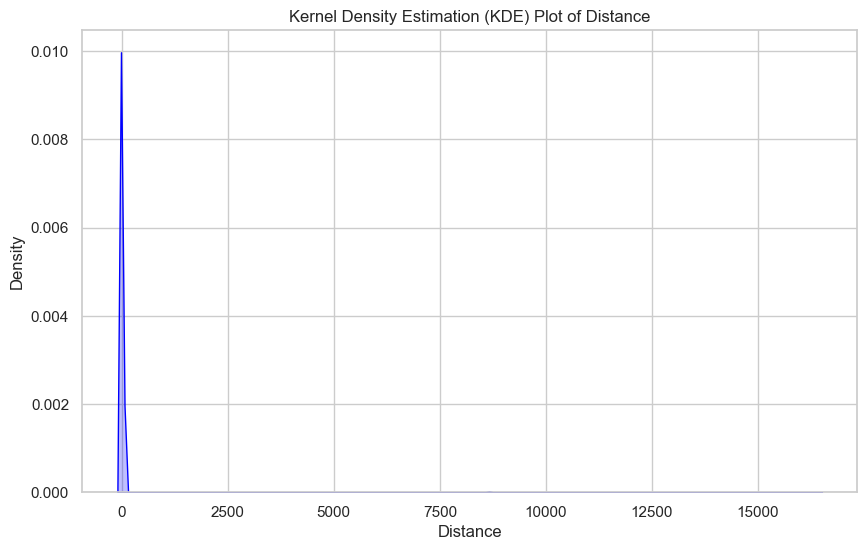

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(uber_data['haversine_distance'], color='blue', shade=True)
plt.title('Kernel Density Estimation (KDE) Plot of Distance')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.show()

### where it looks like a pareto distribution

In [39]:
uber_data['haversine_distance'].min()

0.0

In [40]:
uber_data['haversine_distance'].max()

16409.239135313168

### spliting the Data

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(uber_data.drop(columns = ['fare_amount'],axis=1),
                                                    uber_data['fare_amount'],
                                                    test_size=0.3,
                                                    random_state=100)

In [42]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((139999, 3), (60000, 3), (139999,), (60000,))

In [43]:
catg_pipeline = Pipeline(steps = [

    ('oneHotEndoding' , OneHotEncoder(sparse_output = False , drop = 'first'))
])

In [44]:
cont_pipeline = Pipeline(steps = [
    
    ('RobustScaler' , RobustScaler()),
    ('PowerTransformer' , PowerTransformer())
    
])


In [45]:
pre_col_Transformer = ColumnTransformer(transformers = [
    
    ('catg_pipeline' , catg_pipeline   , ['ride_week_day']),
    ('cont_pipeline' , cont_pipeline   , ['haversine_distance']),
    
    
],remainder = 'passthrough')

In [46]:
final_pipeline = Pipeline(steps = [
    
    ('pre_col_Transformer' , pre_col_Transformer)
])

In [47]:
final_pipeline

Pipeline(steps=[('pre_col_Transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('catg_pipeline',
                                                  Pipeline(steps=[('oneHotEndoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['ride_week_day']),
                                                 ('cont_pipeline',
                                                  Pipeline(steps=[('RobustScaler',
                                                                   RobustScaler()),
                                                                  ('PowerTransformer',
                                                                   PowerTransformer())]),
                                                  ['haversine_distance'])]))])

In [48]:
X_train_processed = pd.DataFrame(final_pipeline.fit_transform(X_train) ,
                                 columns = final_pipeline.get_feature_names_out(), 
                                 index = X_train.index )

In [49]:
X_test_processed = pd.DataFrame(final_pipeline.transform(X_test) ,
                                 columns = final_pipeline.get_feature_names_out(), 
                                 index = X_test.index )

# MODELLING AND EVALUATION`

## LinearRegression

In [50]:
n = len(X_test)
p = X_test.shape[1]

In [51]:
lr = LinearRegression()
lr.fit(X_train_processed, Y_train)
y_pred_lr = lr.predict(X_test_processed)
r_squared = r2_score(Y_test, y_pred_lr)
adjusted_r_squared_lr = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
adjusted_r_squared_lr

0.3569258817464708

## DecisionTreeRegressor

In [52]:
dr = DecisionTreeRegressor()
dr.fit(X_train_processed, Y_train)
y_pred_d = dr.predict(X_test_processed)
# dr.score(X_test_processed,ytest)
r_squared = r2_score(Y_test, y_pred_d)
adjusted_r_squared_dr = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
adjusted_r_squared_dr

0.5069080205013358

## RandomForestRegressor

In [53]:
rfr = RandomForestRegressor()
rfr.fit(X_train_processed, Y_train)
y_pred_rfr = rfr.predict(X_test_processed)
# rrr.score(X_test_processed,ytest)
r_squared = r2_score(Y_test, y_pred_rfr)
adjusted_r_squared_rfr = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
adjusted_r_squared_rfr

0.6450411680882397

## KNeighborsRegressor

In [54]:
knr = KNeighborsRegressor()
knr.fit(X_train_processed, Y_train)
y_pred_knr = knr.predict(X_test_processed)
# knr.score(X_test_processed,ytest)
adjusted_r_squared_knr = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
adjusted_r_squared_knr

0.6450411680882397

In [55]:
min(adjusted_r_squared_lr, adjusted_r_squared_dr, adjusted_r_squared_rfr, adjusted_r_squared_knr)

0.3569258817464708

### `The LinearRegression algorithm will give the least adjusted R square value : 0.3569258817464708`